In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import numpy as np
import matplotlib.pyplot as plt
import analysis
import rgRPA

import scipy.constants as cnt

import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis.analysis as mda
from matplotlib.lines import Line2D

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
tr = md.load(...)
for f in range(tr.n_frames):
    tr[f].save_pdb(f'/home/marcr/PR{f:04d}.pdb')

## Summary

**[1. KH Model](#1)**


**[2. E4 Variants](#2)**


**[3. HPS Slab test](#3)**

### 1. KH Model <a id='1'></a>

In [128]:
d4 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_D4-H', equil_frames=100)
wt = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4-H', equil_frames=100)
wt_hps = lmp.LMP(md_dir='/home/adria/data/final/HPS/CPEB4-REX', equil_frames=100)
d4_hps = lmp.LMP(md_dir='/home/adria/data/final/HPS/CPEB4_D4-REX',equil_frames=100)

> Run Completed at 1.65% for None. Ran 16550000 steps for a total of 332 frames 
> Taking frames every None for a total of [232, 638, 668, 685, 665, 759, 772, 831] to avoid strong correlations
> Run Completed at 2.37% for None. Ran 23700000 steps for a total of 475 frames 
> Taking frames every None for a total of [602, 375, 658, 404, 424, 744, 778, 843] to avoid strong correlations
> Run Completed at 83.78% for None. Ran 83785000 steps for a total of 16758 frames 
> Taking frames every None for a total of [16658, 16658, 16658, 16658, 16658, 16658, 16658, 16658, 16658, 16658, 16658, 16658] to avoid strong correlations
> Run Completed at 84.86% for None. Ran 84855000 steps for a total of 16972 frames 
> Taking frames every None for a total of [16872, 16872, 16872, 16872, 16872, 16872, 16872, 16872, 16872, 16872, 16872, 16872] to avoid strong correlations


In [129]:
d4_rg_kh = d4.rg()
wt_rg_kh = wt.rg()

Text(0, 0.5, 'Rg $(\\AA)$')

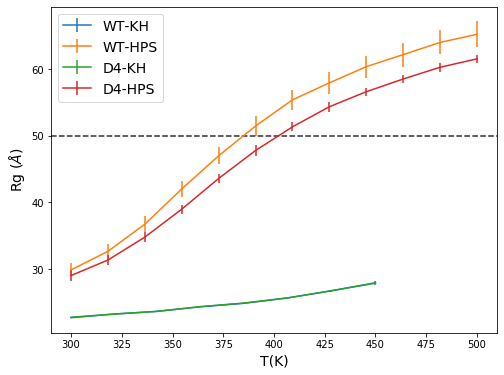

In [130]:
plt.figure(figsize=(8,6))
plt.errorbar(wt.temperatures, wt_rg_kh[0], yerr=wt_rg_kh[1], label='WT-KH')
plt.errorbar(wt_hps.temperatures, wt_hps.rg()[0], yerr=wt_hps.rg()[1], label='WT-HPS')
plt.errorbar(d4.temperatures, d4_rg_kh[0], yerr=d4_rg_kh[1], label='D4-KH')
plt.errorbar(d4_hps.temperatures, d4_hps.rg()[0], yerr=d4_hps.rg()[1], label='D4-HPS')
plt.legend(fontsize=14)
plt.axhline(wt.dig_rg(), ls='--', color='black', alpha=0.5)
plt.axhline(d4.dig_rg(), ls='--', color='black', alpha=0.5)
plt.xlabel('T(K)', fontsize=14)
plt.ylabel('Rg $(\AA)$', fontsize=14)

### 2. E4 Variants <a id='2'></a>

In [5]:
temperatures = np.linspace(280,400,8)
lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/prod/lammps/final/HPS/WT',
                  temperatures=temperatures,
                  debye=0.1, 
                  processors=3,
                  host="@perdiu32",
                  chains=1,
                  model='HPS',
                  protein='CPEB4').write_hps_files()

╔═══════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/final/HPS/WT for CPEB4     ║
║---------------------------------------------------------------------------------------║
║   PARAMETERS                                                                          ║
║       - Model = HPS                                                                   ║
║       - Chains = 1                                                                    ║
║       - Ionic Strength (mM) = 0.1                                                     ║
║       - Medium Permittivity = 80.0                                                    ║
║       - Temperatures (K) = [280.         297.14285714 314.28571429 331.42857143 348.57142857
 365.71428571 382.85714286 400.        ]    ║
║       - HPS Scale = 1.0                                                               ║
╚════════════════════════════════════════════════

In [6]:
temperatures = np.linspace(280,400,8)
lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/prod/lammps/final/HPS/D4',
                  temperatures=temperatures,
                  debye=0.1, 
                  processors=3,
                  host="@perdiu30",
                  chains=1,
                  model='HPS',
                  protein='CPEB4_D4').write_hps_files()

╔══════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/final/HPS/D4 for CPEB4_D4     ║
║------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                             ║
║       - Model = HPS                                                                      ║
║       - Chains = 1                                                                       ║
║       - Ionic Strength (mM) = 0.1                                                        ║
║       - Medium Permittivity = 80.0                                                       ║
║       - Temperatures (K) = [280.         297.14285714 314.28571429 331.42857143 348.57142857
 365.71428571 382.85714286 400.        ]    ║
║       - HPS Scale = 1.0                                                                  ║
╚═════════════════════

In [125]:
wt = lmp.LMP(md_dir='/home/adria/data/final/HPS/CPEB4-REX')
d4 = lmp.LMP(md_dir='/home/adria/data/final/HPS/CPEB4_D4-REX')
r_to_k = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_RtoK')
e4_to_f = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/dignon/KH/CPEB4_E4_as_F')

> Run Completed at 83.78% for None. Ran 83785000 steps for a total of 16758 frames 
> Taking frames every None for a total of [16458, 16458, 16458, 16458, 16458, 16458, 16458, 16458, 16458, 16458, 16458, 16458] to avoid strong correlations
> Run Completed at 84.86% for None. Ran 84855000 steps for a total of 16972 frames 
> Taking frames every None for a total of [16672, 16672, 16672, 16672, 16672, 16672, 16672, 16672, 16672, 16672, 16672, 16672] to avoid strong correlations
> Run Completed at 100.00% for None. Ran 1000000000 steps for a total of 20001 frames 
> Taking frames every None for a total of [19701, 19701, 19701, 19701, 19701, 19701] to avoid strong correlations
> Run Completed at 65.33% for None. Ran 653300000 steps for a total of 13067 frames 
> Taking frames every None for a total of [12768, 14777, 17422, 19701, 19701, 19701] to avoid strong correlations


Text(0, 0.5, 'Rg $(\\AA)$')

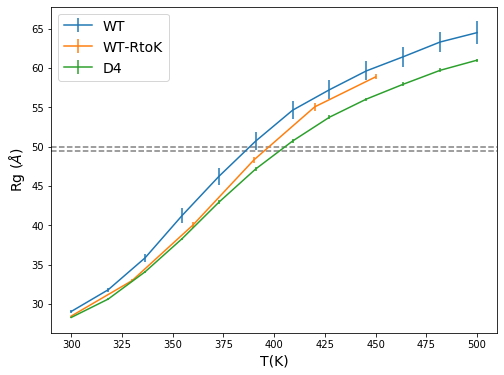

In [126]:
plt.figure(figsize=(8,6))
plt.errorbar(wt.temperatures, wt.rg()[0], yerr=wt.rg()[1], label='WT')
plt.errorbar(r_to_k.temperatures, r_to_k.rg()[0], yerr=r_to_k.rg()[1], label='WT-RtoK')
plt.errorbar(d4.temperatures, d4.rg()[0], yerr=d4.rg()[1], label='D4')
plt.legend(fontsize=14)
plt.axhline(wt.dig_rg(), ls='--', color='black', alpha=0.5)
plt.axhline(d4.dig_rg(), ls='--', color='black', alpha=0.5)
plt.xlabel('T(K)', fontsize=14)
plt.ylabel('Rg $(\AA)$', fontsize=14)

Text(0, 0.5, 'ν')

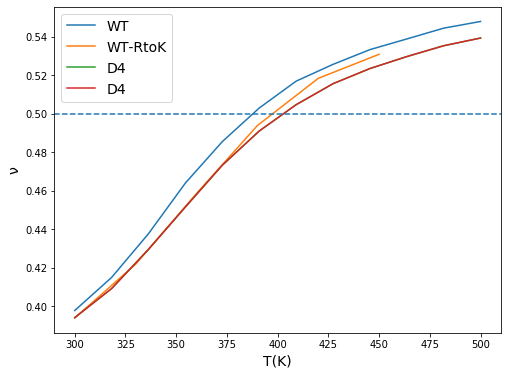

In [127]:
plt.figure(figsize=(8,6))
plt.plot(wt.temperatures, wt.flory_scaling_formula(), label='WT')
plt.plot(r_to_k.temperatures, r_to_k.flory_scaling_formula(), label='WT-RtoK')
plt.plot(d4.temperatures, d4.flory_scaling_formula(), label='D4')
plt.plot(d4.temperatures, d4.flory_scaling_formula(), label='D4')
plt.legend(fontsize=14)
plt.axhline(0.5, ls='--')
plt.xlabel('T(K)', fontsize=14)
plt.ylabel('ν', fontsize=14)

In [80]:
print(wt.dig_rg(), wt.rw_rg())

49.89415968474512 47.52543178832431


In [81]:
print(d4.dig_rg(), d4.rw_rg())

49.446669392671446 47.099186121772135


### 3. HPS Slab test <a id='3'></a>

In [5]:
prots = ['CspTm', 'Integrase', 'ProTa-N', 
         'ProTa-C', 'R15', 'R17', 
         'hCyp', 'Protein-L', 'ACTR', 
         'hNHE1cdt', 'sNase', 'ASYN']
hosts = ["@perdiu29"]*6+["@perdiu27"]*6
Is = np.array([42,50,42,42,128,128,85,128,199,199,17,156])*10**-3
for i in range(len(prots)):
    print(f"DOING {prots[i]}")
    lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/HPS_TEST2/{i}.{prots[i]}',
                     temperatures=[298],
                     ionic_strength=Is[i],
                     protein=prots[i],
                     model='HPS',
                     t=int(1e9),
                     processors=2,
                     host=hosts[i],
                     chains=1,
                     save=10000).write_hps_files(qsub=True, silent=True)

DOING CspTm
DOING Integrase
DOING ProTa-N
DOING ProTa-C
DOING R15
DOING R17
DOING hCyp
DOING Protein-L
DOING ACTR
DOING hNHE1cdt
DOING sNase
DOING ASYN


Text(0, 0.5, 'Rg Sim ($\\AA$)')

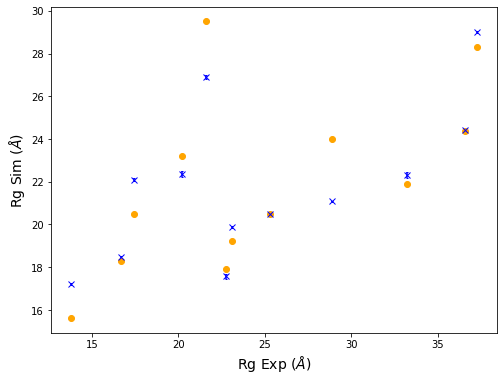

In [133]:
test_prots = ['CspTm', 'Integrase', 'ProTa-N', 'ProTa-C', 'R15', 'R17',
              'hCyp', 'Protein-L', 'ACTR', 'hNHE1cdt', 'sNase', 'ASYN']

dig_data = np.genfromtxt('/home/adria/documents/HPS_data.csv', delimiter=',')*10.

plt.figure(figsize=(8,6))
for i, prot in enumerate(test_prots):
    tr = lmp.LMP(md_dir=f'/home/adria/perdiux/prod/lammps/dignon/HPS_TEST/{i}.{prot}', equil_frames=500, every=5, silent=True)
    rg = tr.rg() # 1 temperature
    plt.errorbar(dig_data[i,0], rg[0], yerr=rg[1], capsize=1, marker='x', color='blue')
    plt.plot(dig_data[i,0], dig_data[i,1], color='orange', marker='o')
plt.xlabel("Rg Exp ($\AA$)", fontsize=14)
plt.ylabel("Rg Sim ($\AA$)", fontsize=14)

#### HOOMD SLAB TEST

In [69]:
slab_fus = hmd.HMD(md_dir='/home/adria/irb/hoomd/FUS2')

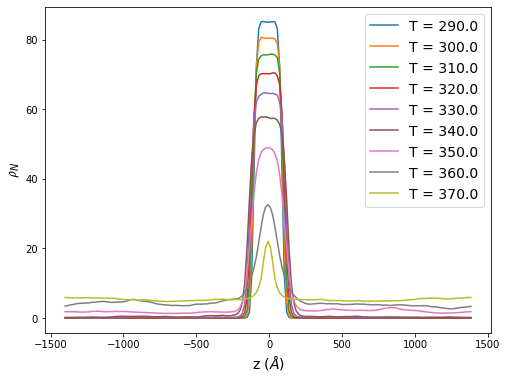

In [70]:
plt.figure(figsize=(8,6))
for i,_ in enumerate(slab_fus.temperatures):
    z, rho_z, shifts = slab_fus.density_profile(T=i)
    plt.plot(z, rho_z.mean(axis=0), label=f"T = {slab_fus.temperatures[i]}")
    plt.xlabel("z ($\AA$)", fontsize=14)
    plt.ylabel("$𝜌_N$", fontsize=14)
plt.legend(fontsize=14)

290.0
Interfaces at  [-50, 50] [-500, 500]
300.0
Interfaces at  [-50, 50] [-500, 500]
310.0
Interfaces at  [-50, 50] [-500, 500]
320.0
Interfaces at  [-50, 50] [-500, 500]
330.0
Interfaces at  [-50, 50] [-500, 500]
340.0
Interfaces at  [-50, 50] [-500, 500]
350.0
Interfaces at  [-50, 50] [-500, 500]
360.0
Interfaces at  [-50, 50] [-500, 500]
370.0
Interfaces at  [-50, 50] [-500, 500]


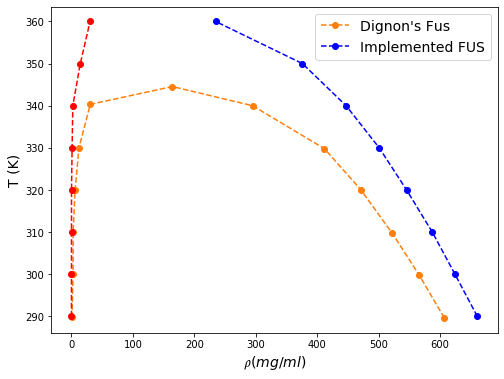

In [83]:
plt.figure(figsize=(8,6))
exp_data = np.genfromtxt('/home/adria/documents/fus.txt', delimiter=',')
plt.plot(exp_data[:,0], exp_data[:,1]*344.4, '--o', color='tab:orange', label='Dignon\'s Fus')
rho_c, rho_d = slab_fus.phase_diagram(intf_c_cutoff=50, intf_d_cutoff=500)
plt.plot(rho_c[:-1], slab_fus.temperatures[:-1], '--ro')
plt.plot(rho_d[:-1], slab_fus.temperatures[:-1],  '--bo', label='Implemented FUS')
plt.xlabel("$𝜌 (mg/ml)$", fontsize=14)
plt.ylabel("T (K)", fontsize=14)
plt.legend(fontsize=14)